In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy

In [2]:
with open("../test/data/masked.pickle", "rb") as fh:
    data = pickle.load(fh)

In [3]:
metadata = {}
for d in data:
    tmp = dict(quantiles=[], sizes=[])
    for i in range(4):
        v = d["pixels"][i][d["mask"][i]]
        if(len(v) > 0):
            tmp["quantiles"].append(numpy.quantile(v, (0.05, 0.95)))
            tmp["sizes"].append(v.size)
        else:
            tmp["quantiles"].append([numpy.nan]*2)
            tmp["sizes"].append(v.size)
            
    tmp["quantiles"] = numpy.array(tmp["quantiles"])
    metadata[d["path"]] = tmp

In [4]:
with open("../test/data/masked_meta.pickle", "wb") as fh:
    pickle.dump(metadata, fh)

In [5]:
values  = []
for i in range(4):
    tmp = numpy.empty(shape=(0,))
    for d in data:
        tmp = numpy.concatenate((tmp, d["pixels"][i][d["mask"][i]]))
    values.append(tmp)

In [6]:
tmp = []
tmp2 = []
for i in range(4):
    tmp2.append((numpy.max(values[i]) - numpy.min(values[i]))*0.05)
    tmp.append(numpy.quantile(values[i], (0.05, 0.95)))
tmp = numpy.array(tmp)
tmp2 = numpy.array(tmp2)

In [7]:
tmp

array([[ 0.07941609,  0.14391974],
       [ 0.00249602,  0.30231654],
       [-0.00783976,  0.2911691 ],
       [-0.03652233,  0.70181963]])

In [130]:
tmp < numpy.tile(tmp2, (2,1)).T

array([[False, False],
       [ True, False],
       [ True, False],
       [ True, False]])

In [112]:
numpy.save("../test/data/quantiles.npy", tmp)

In [132]:
numpy.save("../test/data/quantile_errors.npy", tmp2)

In [36]:
def load_image(event, channels=None):
    from PIL import Image
    
    """
    Load an image from a certain path

    Args:
        path (str): path of image
        channels (list, optional): image channels to load. Defaults to None.

    Returns:
        dict: dictionary containing pixel values (ndarray) and path for each image
    """
    im = Image.open(event["path"])

    if channels is None:
        channels = range(im.n_frames)

    arr = numpy.empty(shape=(len(channels), im.height, im.width), dtype=float)
    for i in channels:
        im.seek(i)
        arr[i] = numpy.array(im)
    return dict(pixels=arr, path=event["path"], idx=event["idx"])

In [51]:
tiff = load_image(dict(path="/data/Experiment_data/VIB/Vulcan/Slava_PBMC/images_subset/pbmc+PI_00000002.tiff", idx=0))

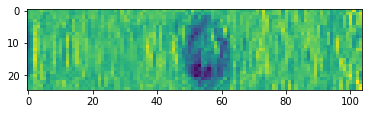

In [52]:
plt.imshow(tiff["pixels"][0])